In [1]:
from matplotlib import pyplot as plt
import librosa
import librosa.display
import os
import numpy as np
import pandas as pd
import IPython.display as ipd
import warnings

In [2]:
file_path = "C:\\Users\\prath\\Downloads\\f1_audio_file\\combined"

In [3]:
from sklearn.cluster import KMeans

In [4]:
def extract_features(audio_file):
    # Load audio file
    data, sample_rate = librosa.load(audio_file)
    
    # Extract features
    mfccs = librosa.feature.mfcc(y=data, sr=sample_rate, n_mfcc=13)
    spectral_bandwidth = librosa.feature.spectral_bandwidth(y=data, sr=sample_rate)[0]
    spectral_centroid = librosa.feature.spectral_centroid(y=data, sr=sample_rate)[0]
    zero_crossing_rate = librosa.feature.zero_crossing_rate(data)[0]
    
    # Concatenate features into a single array
    features = np.concatenate((mfccs.mean(axis=1), 
                               [np.mean(spectral_bandwidth)],
                               [np.mean(spectral_centroid)],
                               [np.mean(zero_crossing_rate)]))
    
    return features

In [5]:
def process_audio_files(file_path):
    features = []
    
    for file_name in os.listdir(file_path):
        if file_name.endswith('.wav'): 
            audio_file = os.path.join(file_path, file_name)
            print("Processing:", audio_file)  # Add this line to check which files are being processed
            file_features = extract_features(audio_file)
            features.append(file_features)
    
    return np.array(features)

features = process_audio_files(file_path)
print("Number of audio files processed:", len(features))  # Add this line to check how many files were processed


Processing: C:\Users\prath\Downloads\f1_audio_file\combined\audioset_1.wav
Processing: C:\Users\prath\Downloads\f1_audio_file\combined\audioset_10.wav
Processing: C:\Users\prath\Downloads\f1_audio_file\combined\audioset_11.wav
Processing: C:\Users\prath\Downloads\f1_audio_file\combined\audioset_12.wav
Processing: C:\Users\prath\Downloads\f1_audio_file\combined\audioset_13.wav
Processing: C:\Users\prath\Downloads\f1_audio_file\combined\audioset_14.wav
Processing: C:\Users\prath\Downloads\f1_audio_file\combined\audioset_15.wav
Processing: C:\Users\prath\Downloads\f1_audio_file\combined\audioset_16.wav
Processing: C:\Users\prath\Downloads\f1_audio_file\combined\audioset_17.wav
Processing: C:\Users\prath\Downloads\f1_audio_file\combined\audioset_18.wav
Processing: C:\Users\prath\Downloads\f1_audio_file\combined\audioset_19.wav
Processing: C:\Users\prath\Downloads\f1_audio_file\combined\audioset_2.wav
Processing: C:\Users\prath\Downloads\f1_audio_file\combined\audioset_20.wav
Processing: C:

In [6]:
features = process_audio_files(file_path)

Processing: C:\Users\prath\Downloads\f1_audio_file\combined\audioset_1.wav
Processing: C:\Users\prath\Downloads\f1_audio_file\combined\audioset_10.wav
Processing: C:\Users\prath\Downloads\f1_audio_file\combined\audioset_11.wav
Processing: C:\Users\prath\Downloads\f1_audio_file\combined\audioset_12.wav
Processing: C:\Users\prath\Downloads\f1_audio_file\combined\audioset_13.wav
Processing: C:\Users\prath\Downloads\f1_audio_file\combined\audioset_14.wav
Processing: C:\Users\prath\Downloads\f1_audio_file\combined\audioset_15.wav
Processing: C:\Users\prath\Downloads\f1_audio_file\combined\audioset_16.wav
Processing: C:\Users\prath\Downloads\f1_audio_file\combined\audioset_17.wav
Processing: C:\Users\prath\Downloads\f1_audio_file\combined\audioset_18.wav
Processing: C:\Users\prath\Downloads\f1_audio_file\combined\audioset_19.wav
Processing: C:\Users\prath\Downloads\f1_audio_file\combined\audioset_2.wav
Processing: C:\Users\prath\Downloads\f1_audio_file\combined\audioset_20.wav
Processing: C:

C:\Users\prath\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


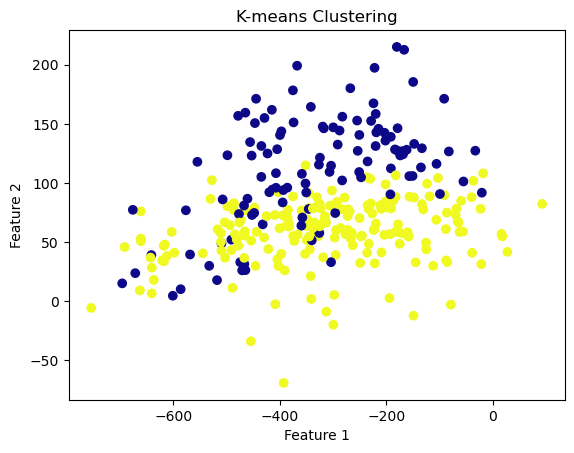

In [7]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(features)


clusters = kmeans.predict(features)

plt.scatter(features[:, 0], features[:, 1], c=clusters, cmap='plasma')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-means Clustering')
plt.show()

In [8]:
cough_cluster = np.argmax(np.bincount(clusters))  
labels = np.where(clusters == cough_cluster, "cough", "non-cough")

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=42)


In [10]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report

classifier = SVC(kernel='rbf', random_state=42)
classifier.fit(X_train, y_train)

predictions = classifier.predict(X_test)

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

       cough       0.97      1.00      0.98        62
   non-cough       1.00      0.93      0.97        30

    accuracy                           0.98        92
   macro avg       0.98      0.97      0.97        92
weighted avg       0.98      0.98      0.98        92



In [21]:
accuracy = accuracy_score(y_test, predictions)
print(f"Model Accuracy: {accuracy:.2f}")

Model Accuracy: 0.98


In [11]:
import joblib

# Save the trained classifier to a file
joblib.dump(classifier, 'svm_classifier.pkl')

# Later, to load the saved classifier and make predictions
loaded_classifier = joblib.load('svm_classifier.pkl')

In [12]:
new_audio_file = r"C:\Users\prath\Downloads\1000_Unknown_female_32.wav" 
new_features = extract_features(new_audio_file)

new_features = new_features.reshape(1, -1)

new_predictions = loaded_classifier.predict(new_features)

In [13]:
new_predictions

array(['non-cough'], dtype='<U9')

In [14]:
new_audio_file = r"C:\Users\prath\Downloads\f1_audio_file\combined\fsd_97.wav" 
new_features = extract_features(new_audio_file)

new_features = new_features.reshape(1, -1)

new_predictions = loaded_classifier.predict(new_features)

In [15]:
new_predictions

array(['non-cough'], dtype='<U9')

In [17]:
new_audio_file = r'C:\Users\prath\Downloads\f1_audio_file\combined\audioset_9.wav' 
new_features = extract_features(new_audio_file)

new_features = new_features.reshape(1, -1)

new_predictions = loaded_classifier.predict(new_features)

In [18]:
new_predictions

array(['cough'], dtype='<U9')